<a href="https://colab.research.google.com/github/alharidt16/text-Analysis/blob/main/UAS_TEXT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ujian Akhir Semester Mata Kuliah Text Analysis
- Nama : Al Haridt Mahmudi
- NIM  : 2008108010004

## Get Dataset
Data yang akan digunakan adalah komentar atau review dari pengguna aplikasi Threads

In [67]:
!pip install google_play_scraper
from google_play_scraper import Sort, reviews_all
import pandas as pd

In [78]:
result = reviews_all(
        'com.instagram.barcelona',
        sleep_milliseconds=0,
        lang='id',
        country='id',
        sort=Sort.NEWEST
    )

threads = pd.DataFrame.from_records(result)
threads = threads[['content', 'score' ]]

In [79]:
threads

,content,score
0,sementara,3
1,Bagus,5
2,seru juga ini apk,5
3,sangat membantu,5
4,Zionisme,1
...,...,...
5329,👍🏻👍🏻👍🏻,5
5330,Hiii. Aku pengguna tercepat,5
5331,Hello bruh,5
5332,"Baru mencobanya, Meta sedang berusaha bersaing...",4


In [80]:
data_review_threads= threads

In [81]:
data_review_threads

,content,score
0,sementara,3
1,Bagus,5
2,seru juga ini apk,5
3,sangat membantu,5
4,Zionisme,1
...,...,...
5329,👍🏻👍🏻👍🏻,5
5330,Hiii. Aku pengguna tercepat,5
5331,Hello bruh,5
5332,"Baru mencobanya, Meta sedang berusaha bersaing...",4


In [82]:
def sentiments(rating):
    if (rating == 5) or (rating == 4) :
        return "Positif"
    else :
        return "Negatif"
# Add sentiments to the data
data_review_threads["label"] = data_review_threads["score"].apply(sentiments)
data_review_threads

,content,score,label
0,sementara,3,Negatif
1,Bagus,5,Positif
2,seru juga ini apk,5,Positif
3,sangat membantu,5,Positif
4,Zionisme,1,Negatif
...,...,...,...
5329,👍🏻👍🏻👍🏻,5,Positif
5330,Hiii. Aku pengguna tercepat,5,Positif
5331,Hello bruh,5,Positif
5332,"Baru mencobanya, Meta sedang berusaha bersaing...",4,Positif


In [83]:
data_review_threads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  5334 non-null   object
 1   score    5334 non-null   int64 
 2   label    5334 non-null   object
dtypes: int64(1), object(2)
memory usage: 125.1+ KB


In [84]:
data_review_threads.isna().any()


content    False
score      False
label      False
dtype: bool

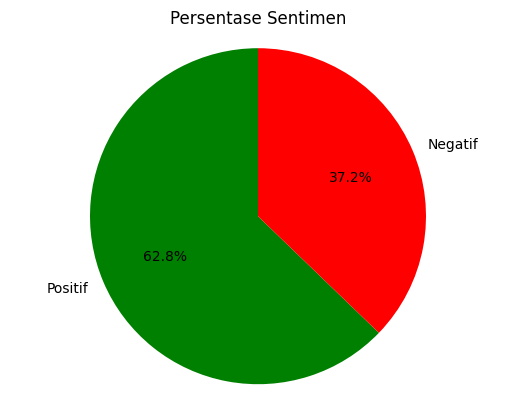

In [86]:
import matplotlib.pyplot as plt

# Menghitung jumlah sentimen positif, netral dan negatif
positif_count = data_review_threads[data_review_threads['label'] == 'Positif'].shape[0]
negatif_count = data_review_threads[data_review_threads['label'] == 'Negatif'].shape[0]

# Data untuk diagram lingkaran
labels = ['Positif', 'Negatif']
sizes = [positif_count, negatif_count]

# Warna
colors = ['green','red']

# Pengaturan plot
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Pengaturan tambahan
ax.axis('equal')  # Agar diagram lingkaran terlihat bulat

# Judul diagram
plt.title('Persentase Sentimen')

# Tampilkan diagram lingkaran
plt.show()

## Text PreProcessing
Prapemrosesan teks atau yang lebih dikenal dengan nama text preprocessing yaitu proses membersihkan data sebelum diolah nantinya. Pada tahapan ini terdapat 5 proses diantaranya:

## CLEANING

In [87]:
pd.set_option('display.max_columns', None)
data_review_threads=data_review_threads[['content', 'label']]
data_review_threads.head(20)

,content,label
0,sementara,Negatif
1,Bagus,Positif
2,seru juga ini apk,Positif
3,sangat membantu,Positif
4,Zionisme,Negatif
5,meski belum mengerti atau memahami cara menggu...,Positif
6,𝒚𝒂,Positif
7,Mantap,Positif
8,Membantu Anda melakukan sesuatu,Positif
9,baru belajar,Positif


## CASE FOLDING
Proses case folding adalah proses mengubah seluruh huruf menjadi huruf kecil. Pada proses ini karakter-karakter 'A'-'Z' yang terdapat pada data diubah kedalam karakter 'a'-'z'.


In [90]:
import re
def  clean_text(df, text_field, new_text_field_name):
    data_review_threads[new_text_field_name] = data_review_threads[text_field].str.lower()
    data_review_threads[new_text_field_name] = data_review_threads[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    # remove numbers
    data_review_threads[new_text_field_name] = data_review_threads[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    return data_review_threads

In [91]:
data_review_threads['text_clean'] = data_review_threads['content'].str.lower()
data_review_threads['text_clean']
data_review_threads_clean = clean_text(data_review_threads, 'content', 'text_clean')
data_review_threads_clean.head(10)

,content,label,text_clean
0,sementara,Negatif,sementara
1,Bagus,Positif,bagus
2,seru juga ini apk,Positif,seru juga ini apk
3,sangat membantu,Positif,sangat membantu
4,Zionisme,Negatif,zionisme
5,meski belum mengerti atau memahami cara menggu...,Positif,meski belum mengerti atau memahami cara menggu...
6,𝒚𝒂,Positif,
7,Mantap,Positif,mantap
8,Membantu Anda melakukan sesuatu,Positif,membantu anda melakukan sesuatu
9,baru belajar,Positif,baru belajar


## STOPWORD REMOVAL
Stopword adalah kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna. Contoh stopword dalam bahasa Indonesia adalah emoticon “yang”, “dan”, “di”, “dari”, dll. Makna di balik penggunaan stopword yaitu dengan menghapus kata-kata yang memiliki informasi rendah dari sebuah teks, kita dapat fokus pada kata-kata penting sebagai gantinya.

In [92]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('indonesian')
data_review_threads_clean['text_StopWord'] = data_review_threads_clean['text_clean'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
data_review_threads_clean.head(20)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,content,label,text_clean,text_StopWord
0,sementara,Negatif,sementara,
1,Bagus,Positif,bagus,bagus
2,seru juga ini apk,Positif,seru juga ini apk,seru apk
3,sangat membantu,Positif,sangat membantu,membantu
4,Zionisme,Negatif,zionisme,zionisme
5,meski belum mengerti atau memahami cara menggu...,Positif,meski belum mengerti atau memahami cara menggu...,mengerti memahami threads
6,𝒚𝒂,Positif,,
7,Mantap,Positif,mantap,mantap
8,Membantu Anda melakukan sesuatu,Positif,membantu anda melakukan sesuatu,membantu
9,baru belajar,Positif,baru belajar,belajar


## TOKENIZING
Tokenizing adalah proses pemisahan teks menjadi potongan-potongan yang disebut sebagai token untuk kemudian di analisa. Kata, angka, simbol, tanda baca dan entitas penting lainnya dapat dianggap sebagai token. Didalam NLP, token diartikan sebagai “kata” meskipun tokenize juga dapat dilakukan pada paragraf maupun kalimat

In [93]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
data_review_threads_clean['text_tokens'] = data_review_threads_clean['text_StopWord'].apply(lambda x: word_tokenize(x))
data_review_threads_clean.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,content,label,text_clean,text_StopWord,text_tokens
0,sementara,Negatif,sementara,,[]
1,Bagus,Positif,bagus,bagus,[bagus]
2,seru juga ini apk,Positif,seru juga ini apk,seru apk,"[seru, apk]"
3,sangat membantu,Positif,sangat membantu,membantu,[membantu]
4,Zionisme,Negatif,zionisme,zionisme,[zionisme]


## STEMMING
Stemming adalah proses pemetaan dan penguraian bentuk dari suatu kata menjadi bentuk kata dasarnya. Untuk melakukan stemming bahasa Indonesia kita dapat menggunakan library Python Sastrawi yang sudah kita siapkan di awal. Library Sastrawi menerapkan Algoritma Nazief dan Adriani dalam melakukan stemming bahasa Indonesia.

In [94]:
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [95]:
#-----------------STEMMING -----------------
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
#import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}
hitung=0

for document in data_review_threads_clean['text_tokens']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    hitung+=1
    print(hitung,":",term,":" ,term_dict[term])

print(term_dict)
print("------------------------")

# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]


#script ini bisa dipisah dari eksekusinya setelah pembacaaan term selesai
data_review_threads_clean['text_steamindo'] = data_review_threads_clean['text_tokens'].apply(lambda x:' '.join(get_stemmed_term(x)))
data_review_threads_clean.head(20)

Streaming output truncated to the last 5000 lines.
577 : terbaik : baik
578 : reborn : reborn
579 : lengkapi : lengkap
580 : muak : muak
581 : bang : bang
582 : elon : elon
583 : familiar : familiar
584 : netizen : netizen
585 : jd : jd
586 : org : org
587 : berinteraksi : interaksi
588 : sepi : sepi
589 : fb : fb
590 : add : add
591 : fiture : fiture
592 : schedule : schedule
593 : post : post
594 : pleaseee : pleaseee
595 : gaada : gaada
596 : fotur : fotur
597 : draftnya : draftnya
598 : ngetik : ngetik
599 : berjam : jam
600 : jam : jam
601 : hilang : hilang
602 : garagara : garagara
603 : hp : hp
604 : mati : mati
605 : berkali : kali
606 : kek : kek
607 : mood : mood
608 : minim : minim
609 : pitur : pitur
610 : deh : deh
611 : ubah : ubah
612 : format : format
613 : tanggalnya : tanggal
614 : mingguan : minggu
615 : tanggal : tanggal
616 : segmen : segmen
617 : explore : explore
618 : improve : improve
619 : search : search
620 : barnya : bar
621 : kalah : kalah
622 : tiktok : t

,content,label,text_clean,text_StopWord,text_tokens,text_steamindo
0,sementara,Negatif,sementara,,[],
1,Bagus,Positif,bagus,bagus,[bagus],bagus
2,seru juga ini apk,Positif,seru juga ini apk,seru apk,"[seru, apk]",seru apk
3,sangat membantu,Positif,sangat membantu,membantu,[membantu],bantu
4,Zionisme,Negatif,zionisme,zionisme,[zionisme],zionisme
5,meski belum mengerti atau memahami cara menggu...,Positif,meski belum mengerti atau memahami cara menggu...,mengerti memahami threads,"[mengerti, memahami, threads]",erti paham threads
6,𝒚𝒂,Positif,,,[],
7,Mantap,Positif,mantap,mantap,[mantap],mantap
8,Membantu Anda melakukan sesuatu,Positif,membantu anda melakukan sesuatu,membantu,[membantu],bantu
9,baru belajar,Positif,baru belajar,belajar,[belajar],ajar


In [96]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


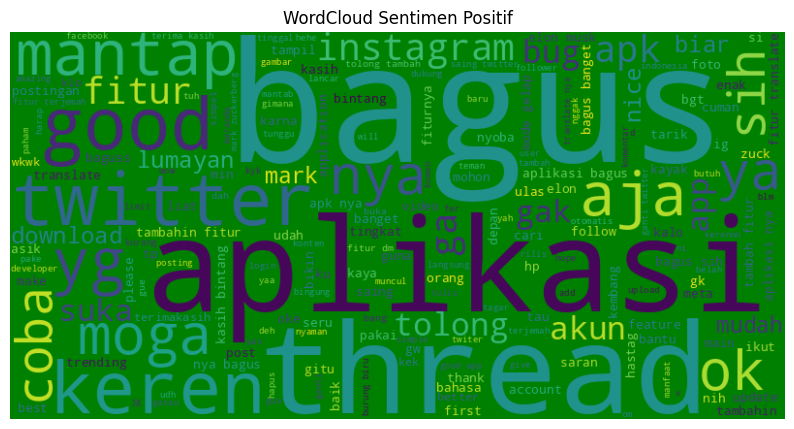

In [97]:
# Menggabungkan semua teks dengan sentimen positif menjadi satu string
text_positive = ' '.join(data_review_threads_clean[data_review_threads_clean['label'] == 'Positif']['text_steamindo'])


# Membuat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='green').generate(text_positive)

# Plot WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Sentimen Positif')
plt.show()

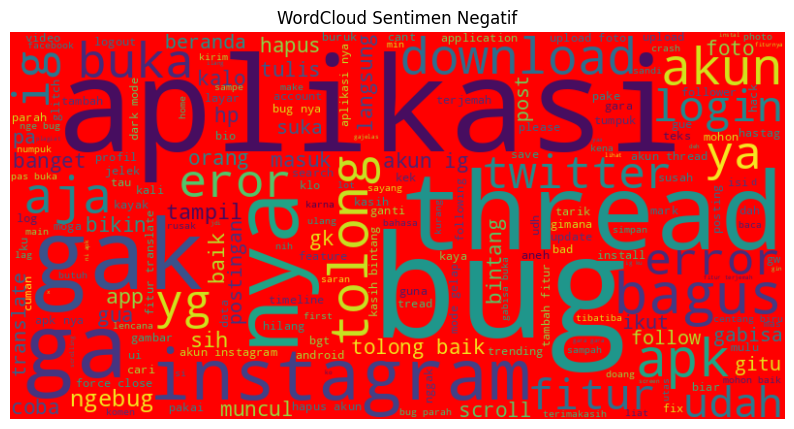

In [98]:
# Menggabungkan semua teks dengan sentimen negatif menjadi satu string
text_positive = ' '.join(data_review_threads_clean[data_review_threads_clean['label'] == 'Negatif']['text_steamindo'])


# Membuat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='red').generate(text_positive)

# Plot WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Sentimen Negatif')
plt.show()

# SPLIT DATA

memecah data test 20% dari keseluruhan data
membagi data Anda menjadi set pelatihan dan set pengujian. Set pelatihan digunakan untuk melatih model Naive Bayes, sedangkan set pengujian digunakan untuk menguji kinerja model.

In [99]:
#disini kita importkan library re, kemudian kita lakukan praproses
import re
def praproses(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)()(?:-)?(?:\)|\(|D|P)',
                           text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text

In [100]:
#membagi data menjadi data training dan testing dengan test_size = 0.20 dan random state nya 0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_review_threads_clean['text_steamindo'], data_review_threads_clean['label'],
                                                    test_size = 0.20,
                                                    random_state = 0)

In [101]:
#PEMBOBOTAN
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [102]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4267,)
(4267,)
(1067,)
(1067,)


In [103]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer()

In [104]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [105]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(tfidf_train, y_train)

MultinomialNB()

In [106]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [107]:
y_pred = nb.predict(tfidf_test)

# Akurasi

In [108]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

In [109]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = MultinomialNB()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

print("MultinomialNB Accuracy:", accuracy_score(y_test,predicted))
print("MultinomialNB Precision:", precision_score(y_test,predicted, average="binary", pos_label="Negatif"))
print("MultinomialNB Recall:", recall_score(y_test,predicted, average="binary", pos_label="Negatif"))
print("MultinomialNB f1_score:", f1_score(y_test,predicted, average="binary", pos_label="Negatif"))

print(f'confusion_matrix:\n {confusion_matrix(y_test, predicted)}')
print('====================================================\n')
print(classification_report(y_test, predicted, zero_division=0))

# Load dataset
#data_clean = pd.read_csv('/kaggle/working/hasil_TextPreProcessing_treads.csv')

#


MultinomialNB Accuracy: 0.7900656044985942
MultinomialNB Precision: 0.7404129793510325
MultinomialNB Recall: 0.648578811369509
MultinomialNB f1_score: 0.6914600550964188
confusion_matrix:
 [[251 136]
 [ 88 592]]

              precision    recall  f1-score   support

     Negatif       0.74      0.65      0.69       387
     Positif       0.81      0.87      0.84       680

    accuracy                           0.79      1067
   macro avg       0.78      0.76      0.77      1067
weighted avg       0.79      0.79      0.79      1067



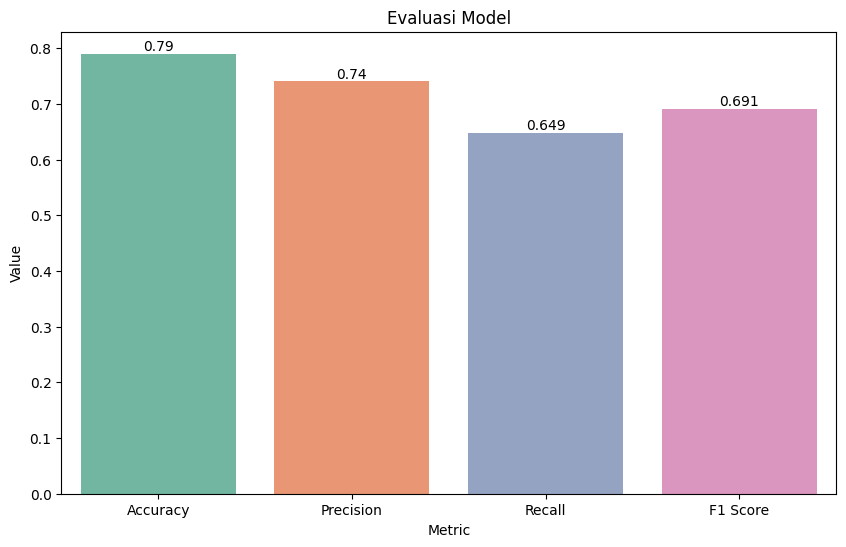

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

# Metrik evaluasi
accuracy = accuracy_score(y_test, predicted)
precision = precision_score(y_test, predicted, average="binary", pos_label="Negatif")
recall = recall_score(y_test, predicted, average="binary", pos_label="Negatif")
f1 = f1_score(y_test, predicted, average="binary", pos_label="Negatif")

# Menyimpan metrik evaluasi dalam sebuah DataFrame
metrics_df = pd.DataFrame({'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
                           'Value': [accuracy, precision, recall, f1]})

# Membuat grafik batang
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', data=metrics_df, palette='Set2')
plt.title('Evaluasi Model')
plt.xlabel('Metric')
plt.ylabel('Value')

# Menampilkan nilai di atas setiap batang
for i, value in enumerate(metrics_df['Value']):
    plt.text(i, value, round(value, 3), ha='center', va='bottom')

# Tampilkan grafik
plt.show()

# KESIMPULAN
Berdasarkan Hasil perhitungan mengenai analisis sentimen Review Aplikasi threads intagram di playsotre dengan metode Bayes Classifier diperoleh kesimpulan yaitu metode  Naive Bayes Mampu Melakukan Klasifikasi komentar secara otomatis dengan bahasapemrograman python. Selain itu, Analisis sentimen
terhadap review pengguna aplikasi threads dengan metode Naive Bayes dengan nilai akurasi 79%